Student Name: Jay Jun Lee

Student ID: 

Task 1: Exploratory Data Analysis (EDA)

Tasks
Dataset to use in the tasks below: bank.csv

This dataset is an excerpt of the Bank Marketing dataset from the UCI repository. Please refer to the description of the dataset at the UCI repository for understanding the meaning of the columns.

Input variables:
   # bank client data:
   1 - age (numeric)
 
 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  
  3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
  4 - education (categorical: "unknown","secondary","primary","tertiary")
  
  5 - default: has credit in default? (binary: "yes","no")
  
  6 - balance: average yearly balance, in euros (numeric) 
  
  7 - housing: has housing loan? (binary: "yes","no")
  
  8 - loan: has personal loan? (binary: "yes","no")
  
  # related with the last contact of the current campaign:
  
  9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
 
 # other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Task 1: Exploratory Data Analysis (EDA)
Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).

How does the distribution of account balances vary across different age in the dataset, and is there a relationship between age and balance?

## Importing dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("bank.csv")

In [94]:
 # Print first 10 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [95]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Dataset has 2000 rows. The last attribute 'subscribed' indicates whether a sale was made. Therefore this can be used as the primary outcome. 

#### B.1. Quick Examination of Numerical Attributes

In [96]:
 # Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


So from this we can see that the only missing values are from age (12)

<Axes: >

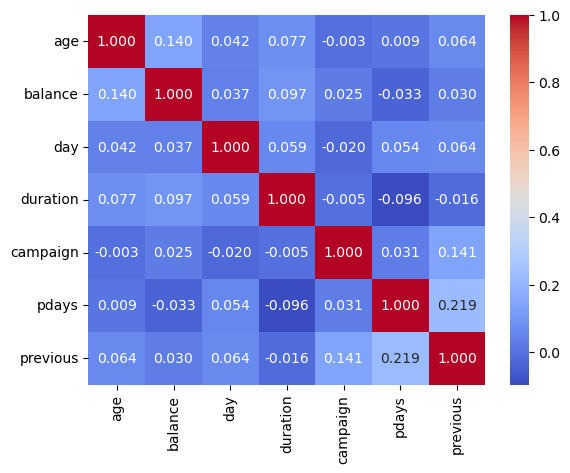

In [105]:
#correlation matrix
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt=".3f")

The heatmap suggest correlation between previous, pdays, campaign, balance and age.

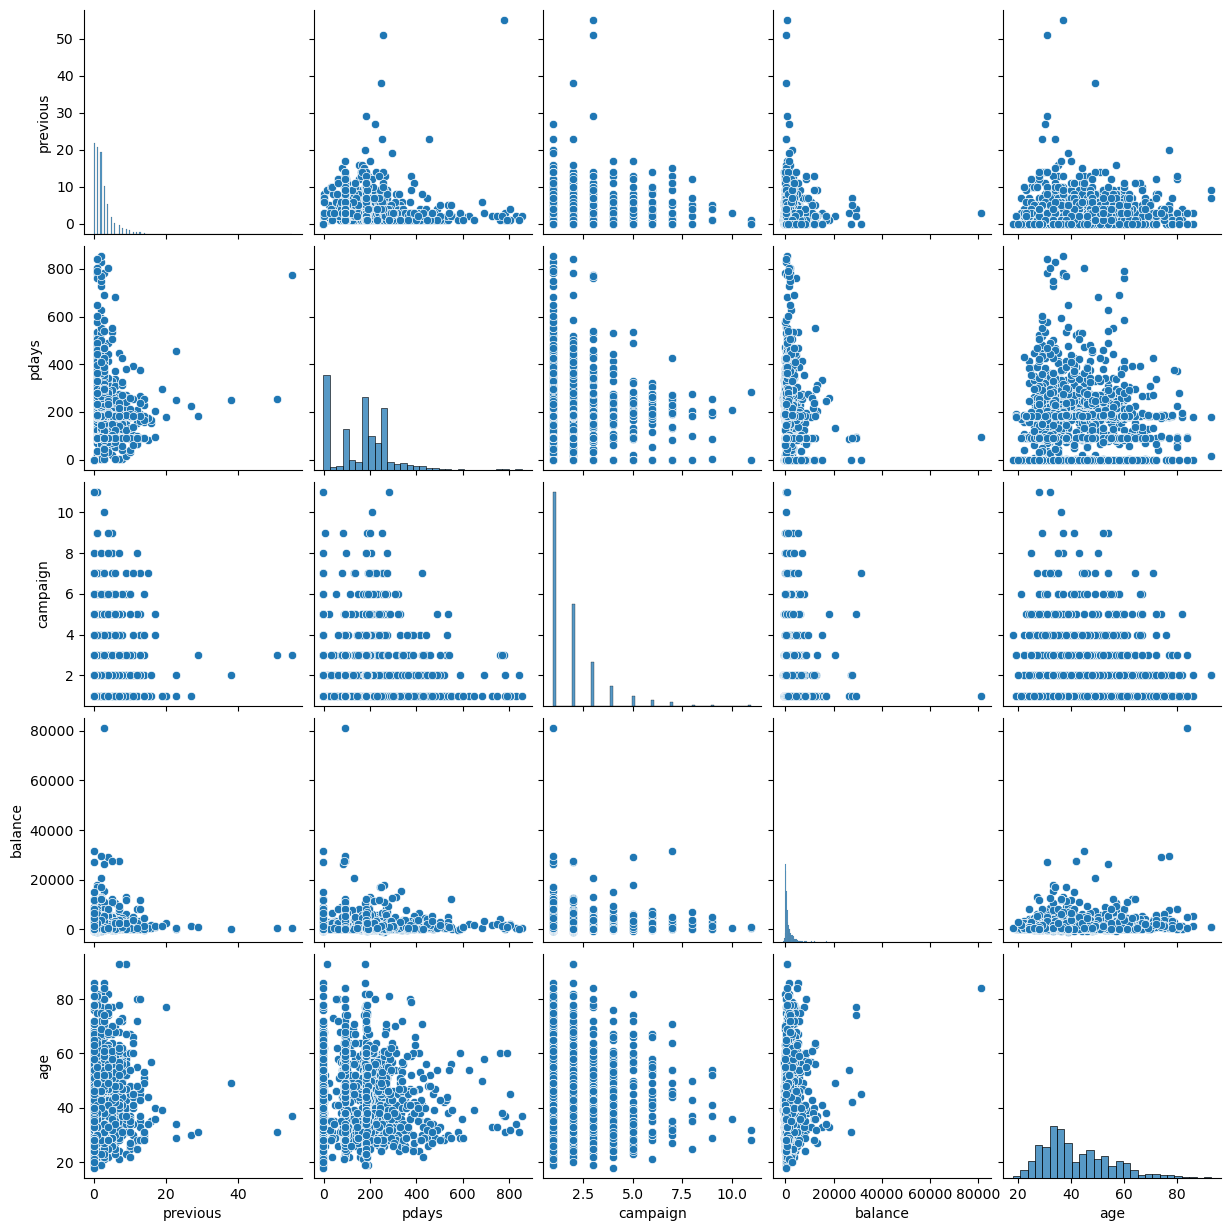

In [106]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['previous','pdays','campaign','balance','age']].dropna())
plt.show()

 #### B.2. Quick Examination of Categorical Attributes

In [114]:
categorical_counts = {} 

for column in categorical_cols:
    total_count = df[column].count()
    category_counts = df[column].value_counts()
    categorical_counts[column] = {'Total Count': total_count, 'Category Counts': category_counts}
for column, counts in categorical_counts.items():
    print(f"\n{column.capitalize()}:")
    print(f"Total Count: {counts['Total Count']}")
    print("Category Counts:")
    print(counts['Category Counts'])



Job:
Total Count: 1990
Category Counts:
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

Marital:
Total Count: 2000
Category Counts:
married     1111
single       674
divorced     215
Name: marital, dtype: int64

Education:
Total Count: 1896
Category Counts:
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

Default:
Total Count: 2000
Category Counts:
no     1985
yes      15
Name: default, dtype: int64

Housing:
Total Count: 2000
Category Counts:
no     1037
yes     963
Name: housing, dtype: int64

Loan:
Total Count: 2000
Category Counts:
no     1750
yes     250
Name: loan, dtype: int64

Contact:
Total Count: 1809
Category Counts:
cellular     1663
telephone     146
Name: contact, dtype: int64

Month:
Total Count: 2000
Category Counts:
feb    404
may 

From the above.
Number of missing values:

    Job- 10
    
    Education- 114
    
    pOutcome- 454

In [181]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64


## C. Distribution Analysis for Numerical Atributes

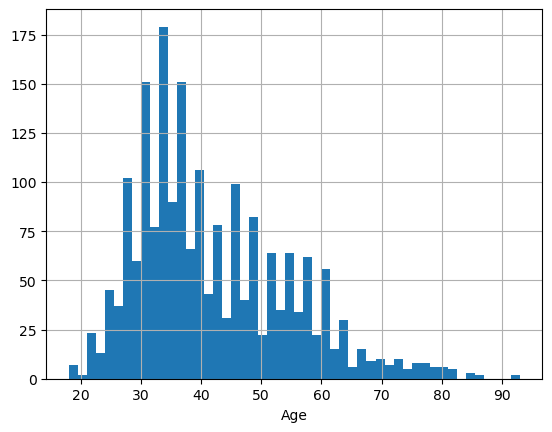

In [122]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.show()

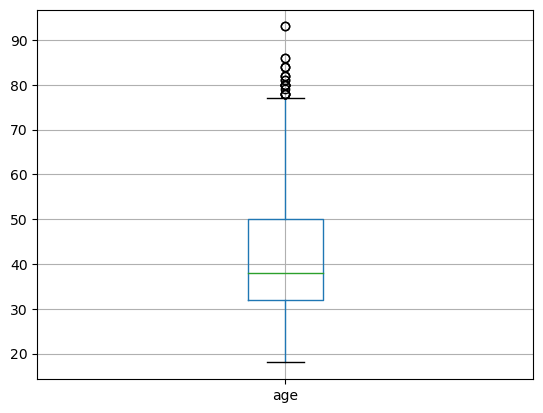

In [123]:
df.boxplot(column='age')
plt.show()

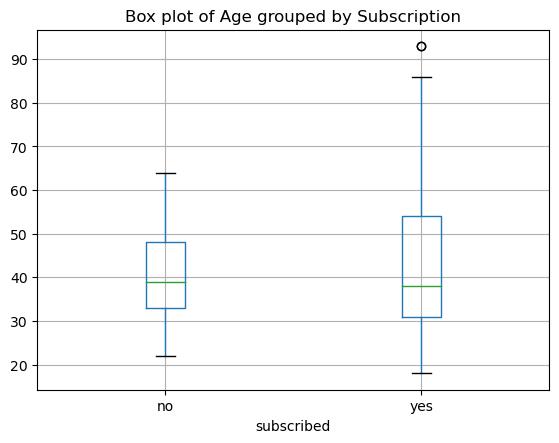

In [126]:
# Boxp lots of age, grouped by the categorical attribute Subscription
df.boxplot(column='age', by='subscribed')
plt.title('Box plot of Age grouped by Subscription')
plt.suptitle("")
plt.show()

No significant difference whether age is a factor for subscription

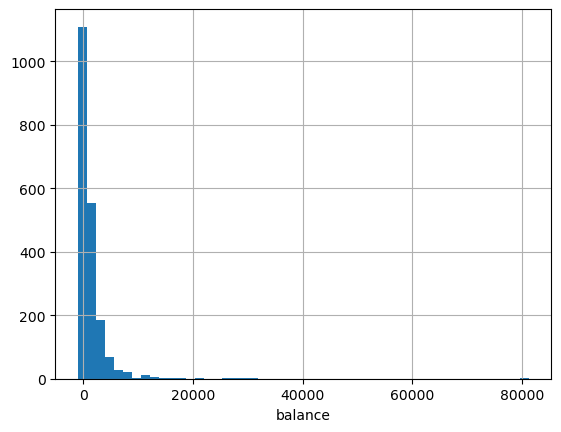

In [127]:
# Next, we examine a histogram of the numerical attribute balance
df['balance'].hist(bins=50)
plt.xlabel("balance")
plt.show()

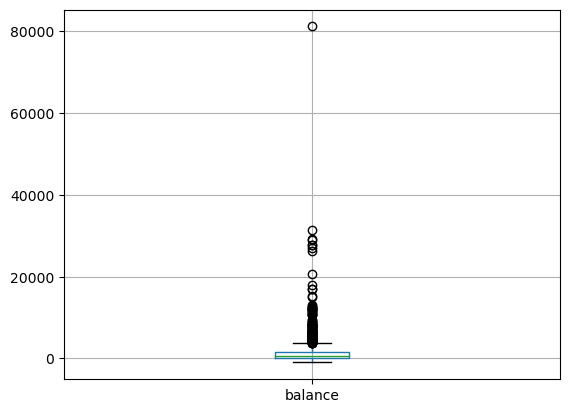

In [128]:
# Boxp lot of balance
df.boxplot(column='balance')
plt.show()

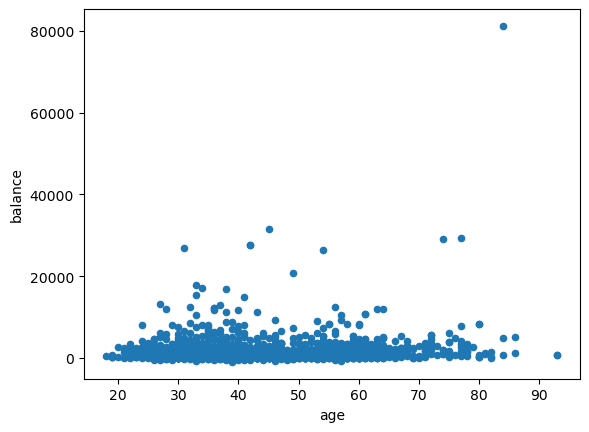

In [129]:
df.plot.scatter(x='age', y='balance')
plt.show()

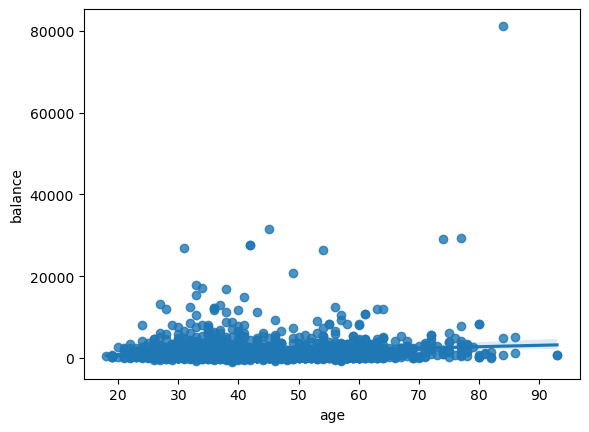

In [130]:
sns.regplot(data=df, x='age', y='balance')
plt.show()

## D. Box Plot Variations

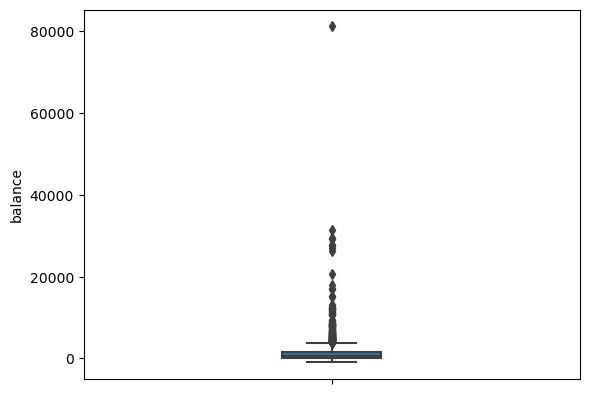

In [134]:
#First, let's draw a seaborn-style box plot for balance

sns.boxplot(y=df['balance'], orient='v', width=0.2)
plt.show()

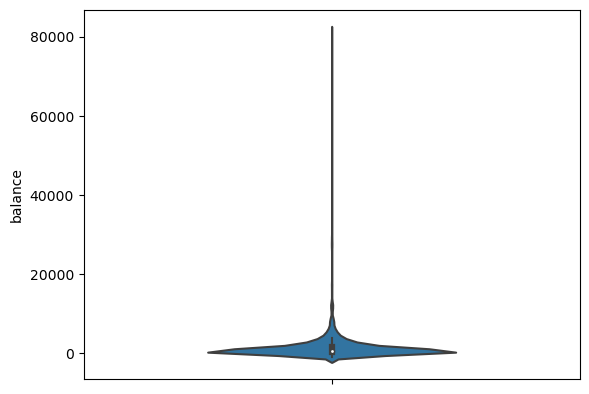

In [136]:
#Violin plot for Balance
sns.violinplot(y=df['balance'], orient='v', width=0.5)
plt.show()

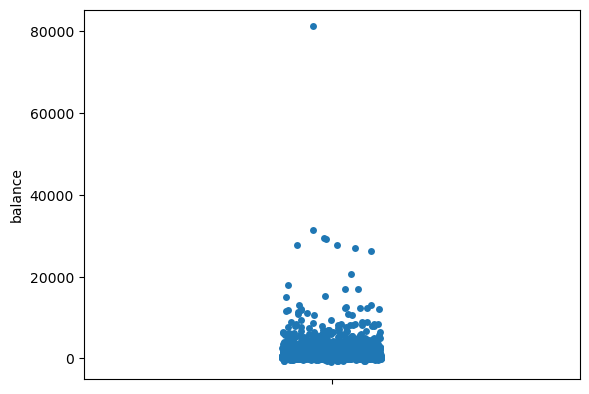

In [139]:
#Strip plot for balance
sns.stripplot(y=df['balance'], jitter=True, orient='v')
plt.show()

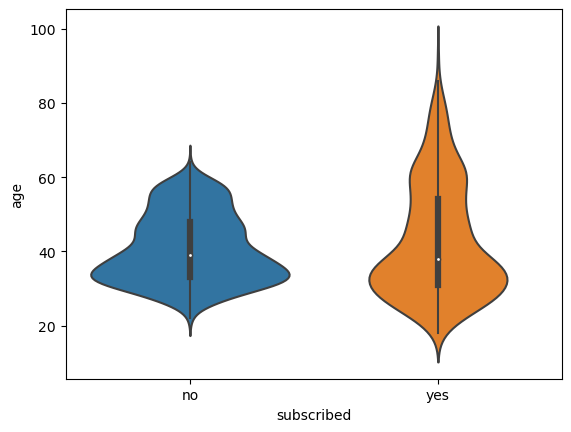

In [143]:
#Redraw the box plots of age grouped by the categorical attribute subscription as violin plots.
sns.violinplot(data=df, x='subscribed', y='age')
plt.show()

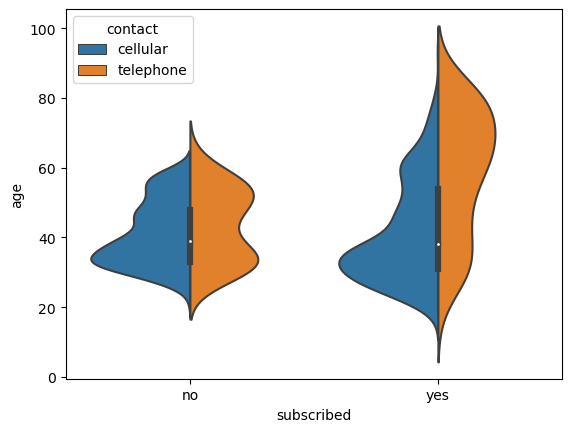

In [151]:
# Split each violin plot by a binary attribute. Adding contact.
sns.violinplot(data=df, x='subscribed', y='age', hue='contact', split=True)
plt.show()

## E. Distribution Analysis for Categorical Attributes

In [153]:
frequency_table = df['housing'].value_counts(ascending=True)
print('Frequency Table for housing:') 
print(frequency_table)

Frequency Table for housing:
yes     963
no     1037
Name: housing, dtype: int64


In [159]:
pivot_table_H = df.pivot_table(values='housing',
                                index='subscribed',
                                aggfunc=lambda x: x.map({'yes': 1, 'no': 0}).mean())

In [160]:
print(pivot_table_H)

            housing
subscribed         
no            0.760
yes           0.203


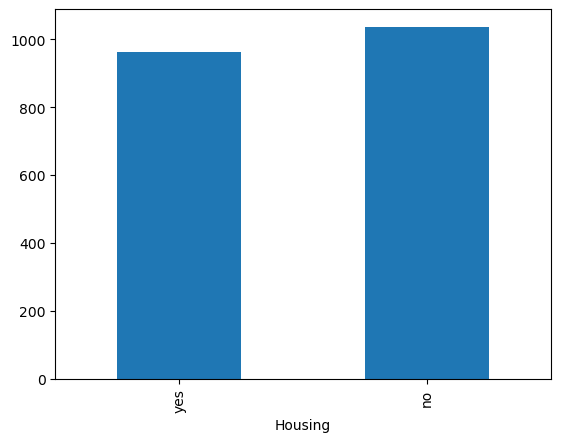

In [162]:
# Plot the frequency table for Housing
frequency_table.plot(kind='bar')
plt.xlabel('Housing')
plt.show()

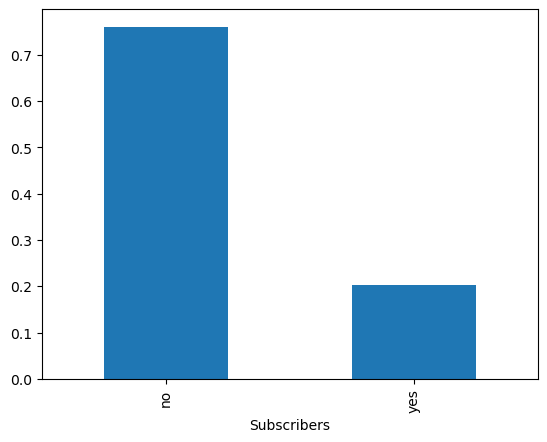

In [167]:
# Plot pivot table
pivot_table_H.plot(kind='bar')
plt.xlabel('Subscribers')
plt.legend().set_visible(False)

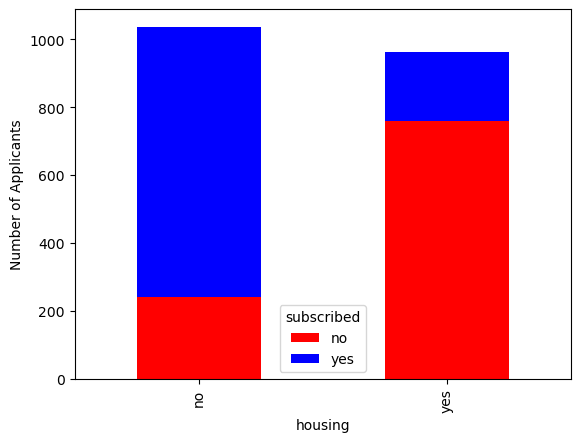

In [170]:
crosstab_HS = pd.crosstab(df['housing'], df['subscribed'])
crosstab_HS.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

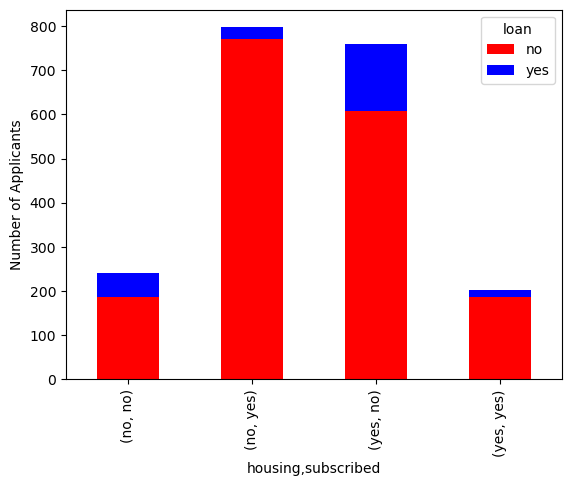

In [177]:
# Create a grouped bar chart
crosstab_HSL = pd.crosstab(index=[df['housing'], df['subscribed']], columns=df['loan'])
crosstab_HSL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

In [179]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

# Create the pivot table
pivot_table_HSL = df.pivot_table(values='housing', 
                                 index='subscribed', 
                                 columns='loan',
                                 aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

# Print the pivot table to inspect the data
print(pivot_table_HSL)

# Create the heatmap
sns.heatmap(pivot_table_HSL, annot=True)
plt.show()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64
Empty DataFrame
Columns: []
Index: []


ValueError: zero-size array to reduction operation fmin which has no identity

Conclusion:
In the initial exploratory data analysis, the average duration of calls for subscribed customers is higher compared to non-subscribed customers.


 # Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

For numerical attributes like age, balance, duration, etc., calculate descriptive statistics such as mean, median, minimum, maximum, and standard deviation.

For categorical attributes like job, marital status, education, etc., calculate frequency counts and proportions for each category.

 # Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

Conclusions: 
The histogram displays a positively skewed distribution for call duration, indicating that most calls were on the side of the shorter duration. The boxplot highlights that subscribed customers tend to have longer call durations compared to non-subscribed customers.

# Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

 ## Task 2: Data Preparation


In the same Jupyter notebook etivity1.ipynb, continue with preparing the bank dataset for machine learning by following the notebook Tutorial 1-2 - Data Preparation.ipynb as an example.

Ensure that you have:

encoded all categorical attributes as numerical,

filled in all missing values,

applied a scaler to rescale features,

treated outliers and skewed attribute distribution appropriately,

created at least one new feature from the existing ones.

Shortly describe and justify the data preparation choices you have made in markdown cells.

In [201]:
df_original = df

In [202]:
df_original.isna().sum()

age           12
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
subscribed     0
dtype: int64

In [203]:
df.drop('poutcome', axis=1, inplace=True)
print(df.tail())


KeyError: "['poutcome'] not found in axis"

In [197]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical attributes
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

# Check the updated DataFrame
print(df.head())

print('poutcome' in df.columns)

KeyError: 'poutcome'

Overview of the data again